In [3]:
# For changing directory
import os

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd

import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif

In [5]:
os.chdir("C:\\Users\\91770\\3D Objects\\Python\\Python class code files\\Logistic Regression\\Chandra_Logistic Regression\\3. Logistic Regression")

In [6]:
hr_data= pd.read_csv('2. HR Analytics - Predicting employee Attrition/HR_comma_sep.csv')

In [7]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
#Running Pandas Profiling
report= pandas_profiling.ProfileReport(hr_data)

In [11]:
report.to_file('hr_data.html')

### missing value treatment

In [12]:
#Checking missing values

hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [13]:
def missing_value_treatment(x):
    if((x.dtypes == 'float64') | (x.dtypes=='int64')):
        
        x= x.fillna(x.median())
    else:
         x=x.fillna(x.mode()[0])
    return x

In [14]:
hr_data= hr_data.apply(missing_value_treatment)

In [15]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Outlier treatment

In [16]:
#Checking Outliers
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
def outlier_treatment(x):
    if((x.dtypes=='float64') | (x.dtypes=='int64')):
        x=x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99))
    else:
        x
    return x

In [18]:
hr_data= hr_data.apply(outlier_treatment)

In [19]:
hr_data.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612760,0.716252,3.803054,201.034802,3.498233,0.144610,0.238083,0.021268
std,0.248517,0.170873,1.232592,49.771459,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.390000,2.000000,104.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,0.990000,1.000000,7.000000,301.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
# Seperating numerical and categorical columns for assumption checking later on

num_var = hr_data.select_dtypes(include=['float64', 'int64'])
cat_var= hr_data.select_dtypes(include= 'object')

### Creating Ordinal Categories for 'salary' variable

In [21]:
mapper = {'low':0, 'medium':1,'high':2}
hr_data['salary_ordinal']= hr_data['salary'].replace(mapper)
hr_data.drop(columns= ['salary'], axis=1, inplace=True)

In [22]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_ordinal
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [23]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary_ordinal             int64
dtype: object

### Creating Dummy variables for 'department' variable

In [24]:
hr_datafinal= pd.get_dummies(hr_data, columns= ['department'], drop_first= True)

In [25]:
hr_datafinal

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_ordinal,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0


In [26]:
hr_datafinal.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
salary_ordinal              int64
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

### Clean data

In [27]:

hr_datafinal.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_ordinal,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0


## Running Logistic Regression

### Assumptions 

In [28]:
## Correlation b.w X and Y variables should be there (Partially fulfilled)
num_var.corrwith(num_var.left)

satisfaction_level      -0.388386
last_evaluation          0.006086
number_project           0.023787
average_montly_hours     0.069358
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
dtype: float64

<AxesSubplot:>

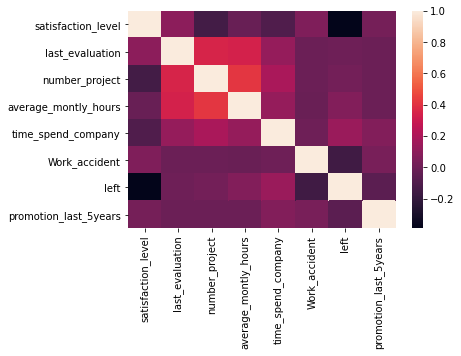

In [29]:
### Correlation b.w X and X variables (should be minimal)
sns.heatmap(num_var.corr())

In [30]:
#No missings
hr_datafinal.isna().sum()


satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
salary_ordinal            0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
dtype: int64

<AxesSubplot:>

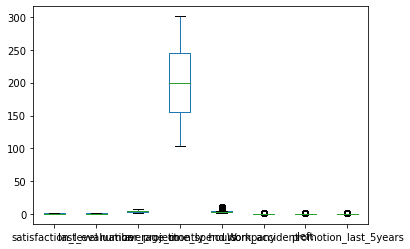

In [31]:
#No outliers in numerical columns
num_var.plot(kind='box')

##############################################################

- Till this point our dataset is cleans bcz
    - No Missing
    - No Outliers (Mild Outliers)
    - No Variables with incorrect data type
    - Dummy Encoding  has been done
    - hot encoding(for ordinal var) has been done.

## Feature Reduction

### method 1: IV(information value)

In [32]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [33]:
for col in hr_datafinal:
    if col == 'left': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(hr_datafinal, col, 'left')
       # print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: satisfaction_level


C:\Users\91770\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 2.05


WoE and IV for column: last_evaluation
IV score: 1.17


WoE and IV for column: number_project
IV score: 2.05


WoE and IV for column: average_montly_hours


C:\Users\91770\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\91770\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score: 0.89


WoE and IV for column: time_spend_company
IV score: 1.09


WoE and IV for column: Work_accident
IV score: 0.19


WoE and IV for column: promotion_last_5years
IV score: 0.03


WoE and IV for column: salary_ordinal
IV score: 0.18


WoE and IV for column: department_RandD
IV score: 0.01


WoE and IV for column: department_accounting
IV score: 0.00


WoE and IV for column: department_hr
IV score: 0.00


WoE and IV for column: department_management
IV score: 0.01


WoE and IV for column: department_marketing
IV score: 0.00


WoE and IV for column: department_product_mng
IV score: 0.00


WoE and IV for column: department_sales
IV score: 0.00


WoE and IV for column: department_support
IV score: 0.00


WoE and IV for column: department_technical
IV score: 0.00




In [34]:
l_iv= ['department_technical','department_support', 'department_sales', 'department_product_mng', 'department_marketing', 
       'department_management','department_hr', 'department_accounting', 'department_RandD', 'salary_ordinal',  
       'promotion_last_5years', 'Work_accident', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']

### method 2: Sommer's D

In [35]:
### As we want this to Sommer'D to be calculated for each X variable seperately. 
### We may have to dothis manually as we do not have a ready made function for this.somerced_val = pd.DataFrame()
somerced_val = pd.DataFrame()
for i_var in hr_datafinal.columns.difference(['left']):
    model = smf.logit('left~'+str(i_var), data=hr_datafinal).fit()
    somerce_d = 2*metrics.roc_auc_score(hr_datafinal.left, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.534317
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546452
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547669
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548747
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548478
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548859
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548798
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548811
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548803
  

In [36]:
somerced_val

,0,1
0,Work_accident,0.127683
0,average_montly_hours,0.0629711
0,department_RandD,0.0243938
0,department_accounting,0.00786189
0,department_hr,0.0143549
0,department_management,0.0216818
0,department_marketing,0.000468544
0,department_product_mng,0.00615643
0,department_sales,0.0104154
0,department_support,0.00893633


In [37]:
somerced_val.columns = ['feature', 'somerce_d']

In [38]:
somerced_val.sort_values(by='somerce_d', ascending=False, inplace=True)
l1_sd = somerced_val[somerced_val.somerce_d>=0.10].feature.values

In [39]:
l1_sd

array(['satisfaction_level', 'time_spend_company', 'salary_ordinal',
       'Work_accident'], dtype=object)

In [40]:
X = hr_datafinal[hr_datafinal.columns.difference(['left'])]
y = hr_datafinal.left

### method 3: RFE

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=10).fit(X,y)

In [43]:
X.columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_ordinal',
       'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [44]:
l2_rfe = X.columns[rfe.get_support()]

In [45]:
l2_rfe

Index(['Work_accident', 'average_montly_hours', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'salary_ordinal', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

### method 4: select K best

In [46]:
SKB = SelectKBest(f_classif, k=10).fit(X, y )

In [47]:
l3_skb = X.columns[SKB.get_support()]

In [48]:
l3_skb

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_hr', 'department_management', 'number_project',
       'promotion_last_5years', 'salary_ordinal', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

In [49]:
l1_sd

array(['satisfaction_level', 'time_spend_company', 'salary_ordinal',
       'Work_accident'], dtype=object)

In [50]:
list(set(l_iv+list(l1_sd)+list(l2_rfe)+list(l3_skb)))

['department_technical',
 'time_spend_company',
 'department_support',
 'number_project',
 'department_marketing',
 'satisfaction_level',
 'department_hr',
 'promotion_last_5years',
 'department_management',
 'department_product_mng',
 'department_sales',
 'department_accounting',
 'Work_accident',
 'last_evaluation',
 'salary_ordinal',
 'average_montly_hours',
 'department_RandD']

In [51]:
Final_list = [
 'time_spend_company',
 #'average_montly_hours',
 'department_hr',
 'department_support',
 'satisfaction_level',
 'department_management',
 'salary_ordinal',
 #'last_evaluation',
 'department_product_mng',
 'number_project',
 'department_RandD',
 'Work_accident',
 'department_accounting',
 'department_technical',
 'promotion_last_5years',
 'department_marketing',
 'department_sales']

In [52]:
X_new= X[Final_list]
y=y

### VIF

In [53]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [54]:
vif.sort_values(by= 'VIF_Factor', ascending= False, inplace= True)
vif

,VIF_Factor,features
7,8.225215,number_project
0,6.360446,time_spend_company
3,5.393340,satisfaction_level
14,3.197516,department_sales
11,2.444764,department_technical
2,2.173911,department_support
5,1.912060,salary_ordinal
6,1.482135,department_product_mng
13,1.458632,department_marketing
4,1.441943,department_management


In [55]:
hr_datanew= pd.concat([X_new, y], axis=1)

In [56]:
hr_datanew.columns

Index(['time_spend_company', 'department_hr', 'department_support',
       'satisfaction_level', 'department_management', 'salary_ordinal',
       'department_product_mng', 'number_project', 'department_RandD',
       'Work_accident', 'department_accounting', 'department_technical',
       'promotion_last_5years', 'department_marketing', 'department_sales',
       'left'],
      dtype='object')

**Summary for Feature Reduction**
- Can find important variables as per IV(information value)
- Can find important variables as per Sommer's D
- Can find important variables as per RFE
- There were no variables having VIF geater than 10

### Splitting the data into train and test

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train, test = train_test_split(hr_datanew, test_size=0.3, random_state=123)

In [59]:
train.shape

(10499, 16)

In [60]:
test.shape

(4500, 16)

In [61]:
train.columns

Index(['time_spend_company', 'department_hr', 'department_support',
       'satisfaction_level', 'department_management', 'salary_ordinal',
       'department_product_mng', 'number_project', 'department_RandD',
       'Work_accident', 'department_accounting', 'department_technical',
       'promotion_last_5years', 'department_marketing', 'department_sales',
       'left'],
      dtype='object')

### Implementing the logistic regression model

In [62]:
eqn = 'left~'+'+'.join(train.columns.difference(['left','department_product_mng', 'department_accounting', 'department_marketing', 'department_sales']))
eqn

'left~Work_accident+department_RandD+department_hr+department_management+department_support+department_technical+number_project+promotion_last_5years+salary_ordinal+satisfaction_level+time_spend_company'

In [63]:
model_logit= smf.logit(eqn, data= hr_datanew).fit()
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.434131
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14987
Method:                           MLE   Df Model:                           11
Date:                Wed, 21 Apr 2021   Pseudo R-squ.:                  0.2090
Time:                        17:19:27   Log-Likelihood:                -6511.5
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1913      0.100     11.909      0.000       0.995       1.

### mathematical equation

In [64]:
train_prob = model_logit.predict(train)
test_prob = model_logit.predict(test)

In [65]:
test_prob

6958     0.092776
7534     0.077397
2975     0.046539
3903     0.136050
8437     0.120744
           ...   
8001     0.064717
11630    0.218841
8163     0.178831
4063     0.161738
2180     0.478435
Length: 4500, dtype: float64

In [66]:
train

,time_spend_company,department_hr,department_support,satisfaction_level,department_management,salary_ordinal,department_product_mng,number_project,department_RandD,Work_accident,department_accounting,department_technical,promotion_last_5years,department_marketing,department_sales,left
5242,2,0,1,0.76,0,1,0,3,0,0,0,0,0,0,0,0
12674,3,0,0,0.46,0,0,0,2,0,0,0,0,0,0,0,1
6924,5,0,1,0.36,0,0,0,3,0,0,0,0,0,0,0,0
12595,4,0,0,0.09,0,0,0,5,0,0,0,0,0,0,0,1
13482,7,0,0,0.58,1,1,0,3,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,4,0,0,0.98,0,1,0,3,0,0,1,0,0,0,0,0
12252,3,0,0,0.19,0,0,0,7,0,0,0,0,0,0,1,1
1346,6,0,1,0.73,0,0,0,4,0,0,0,0,0,0,0,1
11646,7,0,0,0.88,0,1,0,3,0,0,0,0,0,0,1,0


#### Evaluating this above created model using these 4 X variables using the methods that do not involve the threshold (and predicted class) i.e. AUC & Gini

In [67]:
print('train_auc', metrics.roc_auc_score(train.left, train_prob))
print('test_auc', metrics.roc_auc_score(test.left, test_prob))
print('---------------------------------------------------------------')
print('train_gini', 2*metrics.roc_auc_score(train.left, train_prob)-1)
print('test_gini', 2*metrics.roc_auc_score(test.left, test_prob)-1)

train_auc 0.8126554569321165
test_auc 0.8119457562358083
---------------------------------------------------------------
train_gini 0.625310913864233
test_gini 0.6238915124716167


#### Finding the Best Value of Threshold to calculate the other Accuracy metrics that use the predicted class

##### method1. taking cutoff %1's in Y variable

In [68]:
print('% of 1s in Y: ', train.left.mean())

% of 1s in Y:  0.23811791599199925


##### Creating a table for train & test data having the actual labels and the predicted probabilities

In [69]:
train_pred_prob = pd.DataFrame( model_logit.predict(train))
train_pred_prob.columns = ['prob']
train_actual = train['left']
train_predict = pd.concat([train_actual,train_pred_prob],axis = 1)

In [70]:
train_predict.head()

,left,prob
5242,0,0.087803
12674,1,0.465228
6924,0,0.678999
12595,1,0.744775
13482,0,0.090369


In [71]:
test_pred_prob = pd.DataFrame( model_logit.predict(test))
test_pred_prob.columns = ['prob']
test_actual = test['left']
test_predict = pd.concat([test_actual,test_pred_prob],axis = 1)

In [72]:
test_predict.head()

,left,prob
6958,0,0.092776
7534,0,0.077397
2975,0,0.046539
3903,0,0.136050
8437,0,0.120744


In [73]:
hr_datanew.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [74]:
round(3571 / (11428+183),2)  ## we can also Consider this value as the threshold value

0.31

##### method2. Getting cutoff that gives highest sensitivity+specificity

In [75]:
roc_df = pd.DataFrame()
train_temp= train_predict.copy()
for cut_off in np.linspace(0,1):
    #roc_df_temp['cut_off'] = cut_off
    train_temp['y_pred'] = np.where(train_temp.prob>cut_off, 1, 0)
    train_temp['TP'] = np.where(((train_temp.left ==1) & (train_temp.y_pred==1)), 1, 0)
    train_temp['TN'] = np.where(((train_temp.left ==0) & (train_temp.y_pred==0)), 1, 0)
    train_temp['FP'] = np.where(((train_temp.left ==0) & (train_temp.y_pred==1)), 1, 0)
    train_temp['FN'] = np.where(((train_temp.left ==1) & (train_temp.y_pred==0)), 1, 0)
    sensitivity = train_temp['TP'].sum() / (train_temp['TP'].sum() + train_temp['FN'].sum())
    specificity = train_temp['TN'].sum() / (train_temp['TN'].sum() + train_temp['FP'].sum())
    accuracy = (train_temp['TP'].sum()  + train_temp['TN'].sum() ) / (train_temp['TP'].sum() + train_temp['FN'].sum() + train_temp['TN'].sum() + train_temp['FP'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, roc_like_table], axis=0)

In [76]:
 roc_like_table

,cutoff,sensitivity,specificity,accuracy
0,1.0,0.0,1.0,0.761882


In [77]:
roc_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.0000,0.000000,0.238118
0,0.020408,0.9976,0.059507,0.282884
0,0.040816,0.9892,0.152894,0.352034
0,0.061224,0.9768,0.249656,0.422802
0,0.081633,0.9672,0.338917,0.488523


In [78]:
roc_df['Total'] = roc_df.sensitivity+roc_df.specificity

In [79]:
best_cutoff = roc_df.sort_values(by='Total', ascending=False).head(1).cutoff[0]
print('Best_cutoff: ', best_cutoff)

Best_cutoff:  0.3061224489795918


In [80]:
roc_df.head()

,cutoff,sensitivity,specificity,accuracy,Total
0,0.000000,1.0000,0.000000,0.238118,1.000000
0,0.020408,0.9976,0.059507,0.282884,1.057107
0,0.040816,0.9892,0.152894,0.352034,1.142094
0,0.061224,0.9768,0.249656,0.422802,1.226456
0,0.081633,0.9672,0.338917,0.488523,1.306117


##### Finding the classes with best cutoff (0.30) we got and attaching to train_predict & test_predict tables we created earlier

In [81]:
train_predict['y_pred'] = np.where(train_predict.prob>best_cutoff, 1,0)

In [82]:
test_predict['y_pred'] = np.where(test_predict.prob>best_cutoff, 1,0)

In [83]:
#Crosstable for train data

pd.crosstab(train_predict.left, train_predict.y_pred, margins=True)

y_pred,0,1,All
left,,,
0,6538,1461,7999
1,816,1684,2500
All,7354,3145,10499


In [84]:
print(metrics.classification_report(train_predict.left, train_predict.y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      7999
           1       0.54      0.67      0.60      2500

    accuracy                           0.78     10499
   macro avg       0.71      0.75      0.72     10499
weighted avg       0.80      0.78      0.79     10499



In [85]:
#Crosstable for test data

pd.crosstab(test_predict.left, test_predict.y_pred, margins=True)

y_pred,0,1,All
left,,,
0,2797,632,3429
1,348,723,1071
All,3145,1355,4500


In [86]:
print(metrics.classification_report(test_predict.left, test_predict.y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3429
           1       0.53      0.68      0.60      1071

    accuracy                           0.78      4500
   macro avg       0.71      0.75      0.72      4500
weighted avg       0.80      0.78      0.79      4500



In [87]:
train_predict.head()

,left,prob,y_pred
5242,0,0.087803,0
12674,1,0.465228,1
6924,0,0.678999,1
12595,1,0.744775,1
13482,0,0.090369,0


### Decile Analysis: Calculating the KS Value and coming up with the Decile Analysis Table 

### Train

In [88]:
train_predict['Deciles'] = pd.qcut(train_predict['prob'],10,labels=False)

In [89]:
train_predict

,left,prob,y_pred,Deciles
5242,0,0.087803,0,2
12674,1,0.465228,1,8
6924,0,0.678999,1,9
12595,1,0.744775,1,9
13482,0,0.090369,0,3
...,...,...,...,...
5218,0,0.058855,0,1
12252,1,0.513414,1,8
1346,1,0.353186,1,7
11646,0,0.174958,0,5


In [90]:
no_1s = train_predict[['Deciles','left']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['left']
no_total = train_predict[['Deciles','left']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['left']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [91]:
Decile_analysis_train = pd.concat([min_prob,max_prob,no_1s,no_total-no_1s,no_total],axis=1)

In [92]:
Decile_analysis_train.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [93]:
Decile_analysis_train

,Min_prob,Max_prob,#1,#0,Total
Deciles,,,,,
9,0.561906,0.893639,609,441,1050
8,0.427370,0.561878,669,381,1050
7,0.306115,0.427191,409,639,1048
6,0.219062,0.306079,194,858,1052
5,0.164292,0.218841,229,820,1049
4,0.121071,0.164278,165,884,1049
3,0.090369,0.121032,113,938,1051
2,0.062376,0.090277,54,996,1050
1,0.035546,0.062354,34,1016,1050


In [94]:
Decile_analysis_train.reset_index()

,Deciles,Min_prob,Max_prob,#1,#0,Total
0,9,0.561906,0.893639,609,441,1050
1,8,0.427370,0.561878,669,381,1050
2,7,0.306115,0.427191,409,639,1048
3,6,0.219062,0.306079,194,858,1052
4,5,0.164292,0.218841,229,820,1049
5,4,0.121071,0.164278,165,884,1049
6,3,0.090369,0.121032,113,938,1051
7,2,0.062376,0.090277,54,996,1050
8,1,0.035546,0.062354,34,1016,1050
9,0,0.001136,0.035541,24,1026,1050


### Test

In [95]:
test_predict['Deciles'] = pd.qcut(test_predict['prob'],10,labels=False)

In [96]:
test_predict

,left,prob,y_pred,Deciles
6958,0,0.092776,0,2
7534,0,0.077397,0,2
2975,0,0.046539,0,1
3903,0,0.136050,0,4
8437,0,0.120744,0,3
...,...,...,...,...
8001,0,0.064717,0,2
11630,0,0.218841,0,5
8163,0,0.178831,0,5
4063,0,0.161738,0,4


In [97]:
no_1s = test_predict[['Deciles','left']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['left']
no_total = test_predict[['Deciles','left']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['left']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

In [98]:
Decile_analysis_test = pd.concat([min_prob,max_prob,no_1s,no_total-no_1s,no_total],axis=1)

In [99]:
Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [100]:
Decile_analysis_test.reset_index()

,Deciles,Min_prob,Max_prob,#1,#0,Total
0,9,0.559933,0.893639,261,188,449
1,8,0.412130,0.558367,278,173,451
2,7,0.308832,0.411905,183,266,449
3,6,0.224149,0.308317,81,369,450
4,5,0.169638,0.222756,102,349,451
5,4,0.127994,0.169609,71,379,450
6,3,0.094394,0.127961,54,395,449
7,2,0.062505,0.094371,21,430,451
8,1,0.036860,0.062397,14,436,450
9,0,0.001514,0.036819,6,444,450


# KNN classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale

In [102]:
# In KNN we need to have x and y separate in train test split

In [103]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y, test_size= 0.3, random_state = 123)

In [104]:
sc= StandardScaler()
sc= sc.fit(train_X)

In [105]:
train_X_std = pd.DataFrame(sc.transform(train_X), columns = train_X.columns)

In [106]:
test_X_std = pd.DataFrame(sc.transform(test_X), columns = test_X.columns)

In [107]:
#we don't know parameter values of K and Weights
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform', 'distance']} # No. of combinations: 26

In [108]:
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring= 'roc_auc', n_jobs= -1, verbose= True ).fit(train_X_std, train_y)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:   28.9s finished


In [109]:
metrics.SCORERS.keys() # you can select any of the soring methods below to find your best algoritham 
                       # according to the problem i.e classification or regression

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [110]:
knn_model.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [111]:
knn_model.best_score_

0.9740419384771732

In [112]:
knn_model_final = KNeighborsClassifier(n_neighbors = 15, weights= 'distance', n_jobs = -1).fit(train_X_std, train_y)

In [113]:
train_pred_prob = pd.DataFrame(knn_model_final.predict_proba(train_X_std))[1]


In [114]:
test_pred_prob = pd.DataFrame(knn_model_final.predict_proba(test_X_std))[1]

In [115]:
import sklearn.metrics as metrics

### Calculating ROC for train and test

In [116]:
print("roc_auc_Train:", metrics.roc_auc_score(train_y, train_pred_prob))

roc_auc_Train: 0.9998292536567072


In [117]:
print('ROC_AUC_Test:', metrics.roc_auc_score(test_y, test_pred_prob))

ROC_AUC_Test: 0.979416788587701


### Calculating classes by Knn default cutoff i.e. 0.5

In [118]:
train_pred = knn_model_final.predict(train_X_std)
test_pred =knn_model_final.predict(test_X_std)

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
10494    0.0
10495    1.0
10496    1.0
10497    0.0
10498    0.0
Name: 1, Length: 10499, dtype: float64

In [119]:
train_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [120]:
test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [121]:
train_X_std

,time_spend_company,department_hr,department_support,satisfaction_level,department_management,salary_ordinal,department_product_mng,number_project,department_RandD,Work_accident,department_accounting,department_technical,promotion_last_5years,department_marketing,department_sales
0,-1.018353,-0.229887,2.388376,0.583949,-0.214302,0.643303,-0.253085,-0.647770,-0.231718,-0.411283,-0.225257,-0.470513,-0.146636,-0.245978,-0.621589
1,-0.343074,-0.229887,-0.418694,-0.622886,-0.214302,-0.933270,-0.253085,-1.457214,-0.231718,-0.411283,-0.225257,-0.470513,-0.146636,-0.245978,-0.621589
2,1.007483,-0.229887,2.388376,-1.025164,-0.214302,-0.933270,-0.253085,-0.647770,-0.231718,-0.411283,-0.225257,-0.470513,-0.146636,-0.245978,-0.621589
3,0.332204,-0.229887,-0.418694,-2.111316,-0.214302,-0.933270,-0.253085,0.971116,-0.231718,-0.411283,-0.225257,-0.470513,-0.146636,-0.245978,-0.621589
4,2.358040,-0.229887,-0.418694,-0.140152,4.666305,0.643303,-0.253085,-0.647770,-0.231718,-0.411283,-0.225257,-0.470513,6.819589,-0.245978,-0.621589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,0.332204,-0.229887,-0.418694,1.468962,-0.214302,0.643303,-0.253085,-0.647770,-0.231718,-0.411283,4.439379,-0.470513,-0.146636,-0.245978,-0.621589
10495,-0.343074,-0.229887,-0.418694,-1.709037,-0.214302,-0.933270,-0.253085,2.590002,-0.231718,-0.411283,-0.225257,-0.470513,-0.146636,-0.245978,1.608781
10496,1.682761,-0.229887,2.388376,0.463266,-0.214302,-0.933270,-0.253085,0.161673,-0.231718,-0.411283,-0.225257,-0.470513,-0.146636,-0.245978,-0.621589
10497,2.358040,-0.229887,-0.418694,1.066683,-0.214302,0.643303,-0.253085,-0.647770,-0.231718,-0.411283,-0.225257,-0.470513,-0.146636,-0.245978,1.608781


### Classification report & cross table to see the accuracy

In [122]:
# Classification report for train data
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       0.99      0.99      0.99      2500

    accuracy                           0.99     10499
   macro avg       0.99      0.99      0.99     10499
weighted avg       0.99      0.99      0.99     10499



In [123]:
#Crosstable for train data

pd.crosstab(train_y, train_pred, margins=True)

col_0,0,1,All
left,,,
0,7974,25,7999
1,30,2470,2500
All,8004,2495,10499


In [124]:
# Classification report for test data
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3429
           1       0.88      0.94      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.93      0.95      0.94      4500
weighted avg       0.96      0.96      0.96      4500



In [125]:
#Crosstable for test data

pd.crosstab(test_y, test_pred, margins=True)

col_0,0,1,All
left,,,
0,3288,141,3429
1,59,1012,1071
All,3347,1153,4500


### if we go with best cutoff value we got i.e. 0.30 instead of default cutoff

In [126]:
train_pred_1 = np.where(train_pred_prob>best_cutoff, 1,0)
test_pred_1 =np.where(test_pred_prob>best_cutoff, 1,0)

In [127]:
# Classification report for train data
print(metrics.classification_report(train_y, train_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7999
           1       0.98      1.00      0.99      2500

    accuracy                           0.99     10499
   macro avg       0.99      1.00      0.99     10499
weighted avg       0.99      0.99      0.99     10499



In [128]:
# Classification report for test data
print(metrics.classification_report(test_y, test_pred_1))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3429
           1       0.81      0.96      0.88      1071

    accuracy                           0.94      4500
   macro avg       0.90      0.94      0.92      4500
weighted avg       0.94      0.94      0.94      4500



In [129]:
#Crosstable for train data

pd.crosstab(train_y, train_pred_1, margins=True)

col_0,0,1,All
left,,,
0,7941,58,7999
1,2,2498,2500
All,7943,2556,10499


In [130]:
#Crosstable for test data

pd.crosstab(test_y, test_pred_1, margins=True)

col_0,0,1,All
left,,,
0,3188,241,3429
1,43,1028,1071
All,3231,1269,4500


# Decision Tree Classifier

In [133]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text

In [138]:
parm_grid= {'max_depth':[3,4,5,6,7,8,9,10,11,12], 'max_features': [3,4,5,6,7,8,9,10], 'max_leaf_nodes': [6,7,8,9,10]}

In [141]:
dt_clf= GridSearchCV(DecisionTreeClassifier(), parm_grid, cv= 5, scoring= 'roc_auc').fit(train_X, train_y)

In [197]:
dt_clf.best_params_

{'max_depth': 12, 'max_features': 9, 'max_leaf_nodes': 10}

In [145]:
dt_clf.best_score_

0.966349059177611

In [144]:
dt_clf_final= DecisionTreeClassifier(max_depth=9, max_features= 8, max_leaf_nodes= 10).fit(train_X, train_y)

In [146]:
#Finding train & test probabilities of getting 1
train_prob = pd.DataFrame(dt_clf_final.predict_proba(train_X))[1]
test_prob = pd.DataFrame(dt_clf_final.predict_proba(test_X))[1]

In [149]:
print('train_auc:', metrics.roc_auc_score(train_y, train_prob))
print('test_auc:', metrics.roc_auc_score(test_y, test_prob))

train_auc: 0.9227668708588574
test_auc: 0.9155063405745306


In [178]:
pd.Series(dt_clf_final.feature_importances_)

0     0.094849
1     0.000000
2     0.000000
3     0.217287
4     0.000000
5     0.000000
6     0.000000
7     0.668151
8     0.000000
9     0.019713
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
dtype: float64

In [154]:
#Important Features in descending order of their importance
feature_imp = pd.concat([pd.Series(train_X.columns),pd.Series(dt_clf_final.feature_importances_)], axis=1)
feature_imp.columns = ['Feature', 'imp']
feature_imp.sort_values(by='imp', ascending=False)

,Feature,imp
7,number_project,0.668151
3,satisfaction_level,0.217287
0,time_spend_company,0.094849
9,Work_accident,0.019713
1,department_hr,0.000000
2,department_support,0.000000
4,department_management,0.000000
5,salary_ordinal,0.000000
6,department_product_mng,0.000000
8,department_RandD,0.000000


In [153]:
feature_imp

,Feature,imp
0,time_spend_company,0.094849
1,department_hr,0.000000
2,department_support,0.000000
3,satisfaction_level,0.217287
4,department_management,0.000000
5,salary_ordinal,0.000000
6,department_product_mng,0.000000
7,number_project,0.668151
8,department_RandD,0.000000
9,Work_accident,0.019713


In [155]:
features= list(train_X.columns)

In [156]:
features

['time_spend_company',
 'department_hr',
 'department_support',
 'satisfaction_level',
 'department_management',
 'salary_ordinal',
 'department_product_mng',
 'number_project',
 'department_RandD',
 'Work_accident',
 'department_accounting',
 'department_technical',
 'promotion_last_5years',
 'department_marketing',
 'department_sales']

In [179]:
export_text?

In [162]:
#Displaying the tree and rules
print(export_text(dt_clf_final, feature_names= features))
text_representation = export_text(dt_clf_final, feature_names= features)

|--- number_project <= 2.50
|   |--- Work_accident <= 0.50
|   |   |--- class: 1
|   |--- Work_accident >  0.50
|   |   |--- class: 0
|--- number_project >  2.50
|   |--- number_project <= 5.50
|   |   |--- number_project <= 4.50
|   |   |   |--- time_spend_company <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- time_spend_company >  4.50
|   |   |   |   |--- satisfaction_level <= 0.72
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- satisfaction_level >  0.72
|   |   |   |   |   |--- time_spend_company <= 6.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- time_spend_company >  6.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- number_project >  4.50
|   |   |   |--- class: 0
|   |--- number_project >  5.50
|   |   |--- number_project <= 6.50
|   |   |   |--- satisfaction_level <= 0.11
|   |   |   |   |--- class: 1
|   |   |   |--- satisfaction_level >  0.11
|   |   |   |   |--- class: 0
|   |   |--- number_project >  6.50
|   |   |   |--- class: 1



In [163]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=57aaae9ccfe0b18013a7b9320f59626f38f06a6fafd37c0f8a264ff0251b4dc2
  Stored in directory: c:\users\91770\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [169]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [170]:
export_graphviz(dt_clf_final, out_file = "model_tree.odt",
              feature_names = train_X.columns)

In [171]:
import pydotplus as pdot

In [173]:
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_tree.odt' )

In [174]:
chd_tree_graph.write_jpg('model_tree.jpg')

True

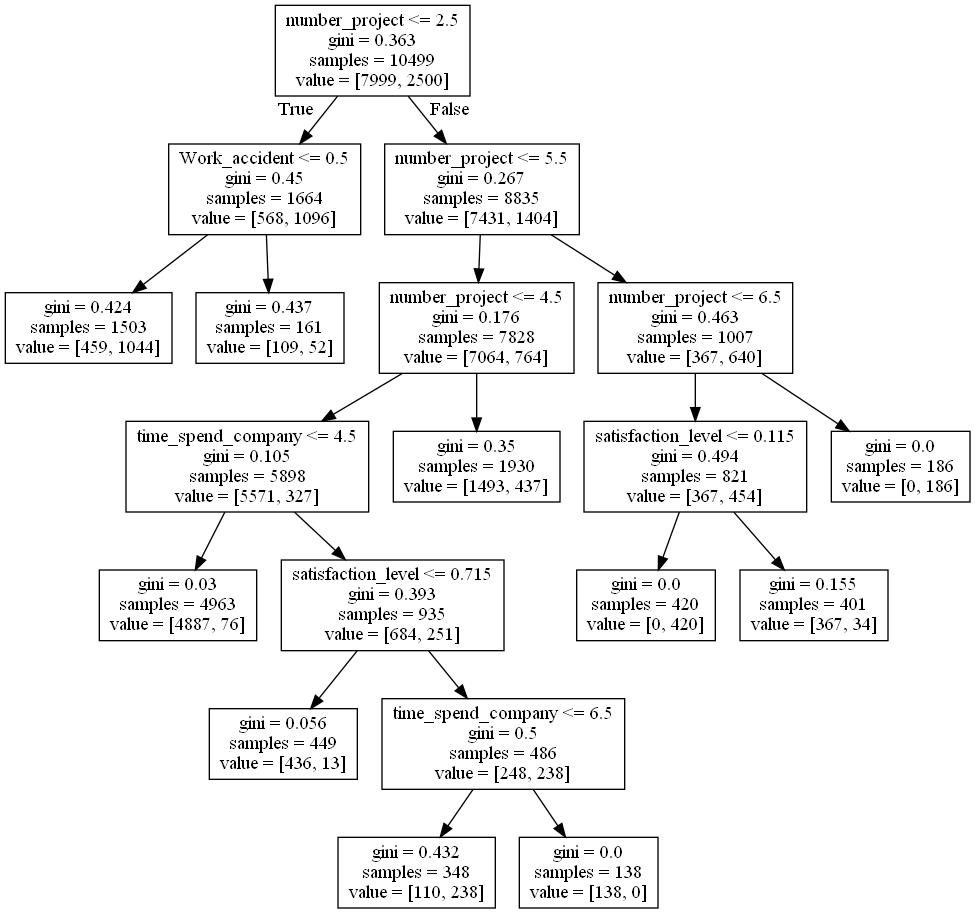

In [176]:
# Viewing the image in the notebook (display the image)
from IPython import display
display.Image(filename='model_tree.jpg')

In [180]:
export_graphviz?


In [184]:
#To make the tree more attractive
from six import StringIO  

#dot_data = StringIO()
export_graphviz(dt_clf_final, 'dot_data.odt',  
                filled=True, rounded=True,
                special_characters=True,feature_names = train_X.columns,class_names=['0','1'])

In [185]:
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_file('dot_data.odt') 

In [186]:
graph.write_png('tree_final.png')

True

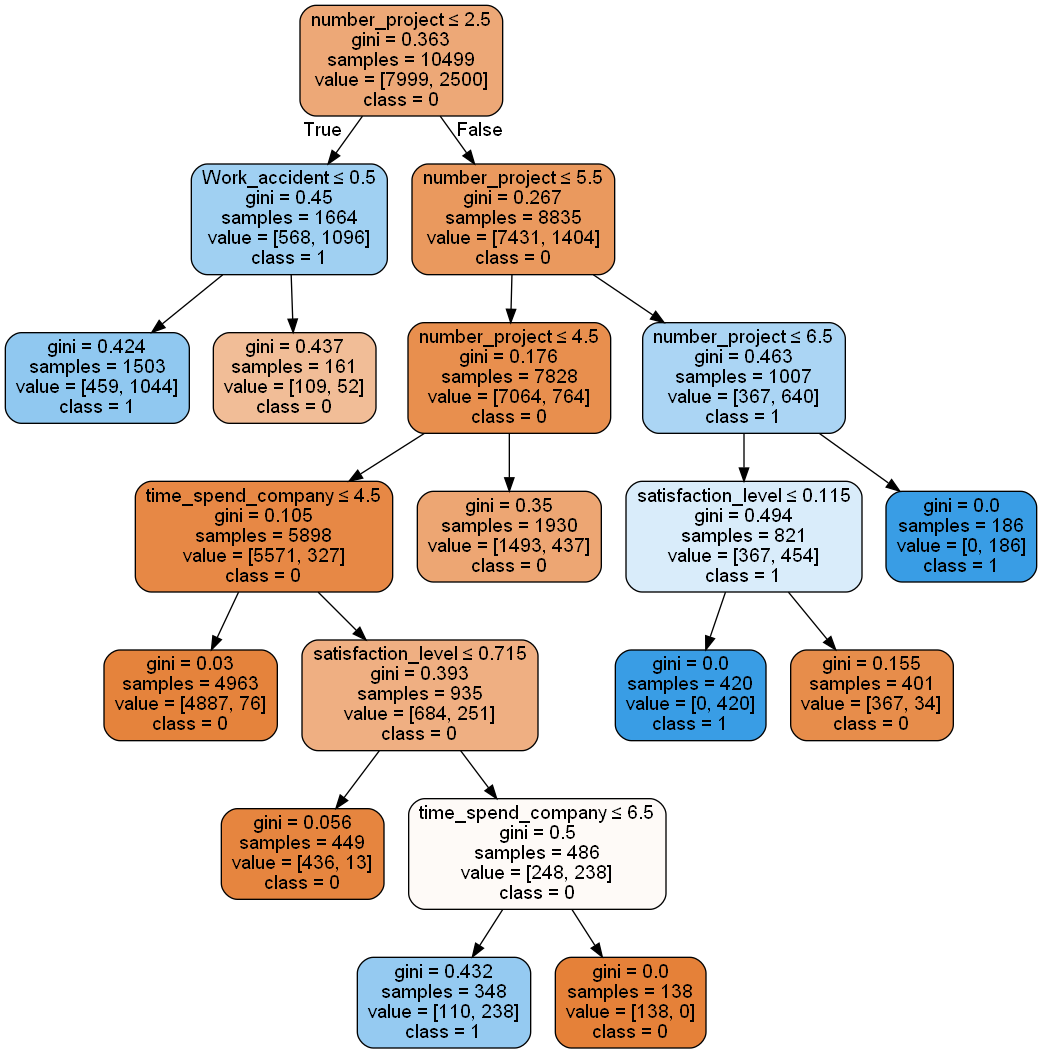

In [187]:
Image('tree_final.png')

In [190]:
#Saving a log file to come up with the rules

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### Coming up with the tree rules

In [191]:
from sklearn.tree import plot_tree

[Text(136.96363636363637, 201.90857142857143, 'number_project <= 2.5\ngini = 0.363\nsamples = 10499\nvalue = [7999, 2500]\nclass = y'),
 Text(60.872727272727275, 170.84571428571428, 'Work_accident <= 0.5\ngini = 0.45\nsamples = 1664\nvalue = [568, 1096]\nclass = e'),
 Text(30.436363636363637, 139.78285714285715, 'gini = 0.424\nsamples = 1503\nvalue = [459, 1044]\nclass = e'),
 Text(91.30909090909091, 139.78285714285715, 'gini = 0.437\nsamples = 161\nvalue = [109, 52]\nclass = y'),
 Text(213.05454545454546, 170.84571428571428, 'number_project <= 5.5\ngini = 0.267\nsamples = 8835\nvalue = [7431, 1404]\nclass = y'),
 Text(152.1818181818182, 139.78285714285715, 'number_project <= 4.5\ngini = 0.176\nsamples = 7828\nvalue = [7064, 764]\nclass = y'),
 Text(121.74545454545455, 108.72, 'time_spend_company <= 4.5\ngini = 0.105\nsamples = 5898\nvalue = [5571, 327]\nclass = y'),
 Text(91.30909090909091, 77.65714285714284, 'gini = 0.03\nsamples = 4963\nvalue = [4887, 76]\nclass = y'),
 Text(152.181

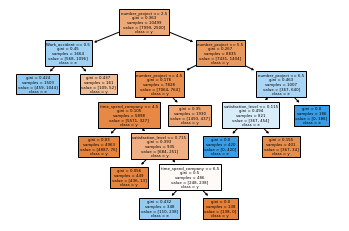

In [192]:
plot_tree(dt_clf_final, 
                   feature_names=train_X.columns,  
                   class_names='yes',
                   filled=True)

In [199]:
dt_clf_final.tree_.node_count

19

In [196]:
dt_clf_final.tree_.n_leaves

10

In [200]:
#some codes to analyze our tree

n_nodes = dt_clf_final.tree_.node_count

children_left = dt_clf_final.tree_.children_left

children_right = dt_clf_final.tree_.children_right

feature = dt_clf_final.tree_.feature

threshold = dt_clf_final.tree_.threshold

print(n_nodes)
print(children_left)
print(children_right)
print(feature)
print(threshold)

19
[ 1 17  3  5 13  7 -1 -1  9 -1 11 -1 -1 15 -1 -1 -1 -1 -1]
[ 2 18  4  6 14  8 -1 -1 10 -1 12 -1 -1 16 -1 -1 -1 -1 -1]
[ 7  9  7  7  7  0 -2 -2  3 -2  0 -2 -2  3 -2 -2 -2 -2 -2]
[ 2.5    0.5    5.5    4.5    6.5    4.5   -2.    -2.     0.715 -2.
  6.5   -2.    -2.     0.115 -2.    -2.    -2.    -2.    -2.   ]


In [202]:
def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False

        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)

        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)

        if left or right :
            return True

        path.remove(node_numb)
        return False

In [203]:
def get_rule(path, column_names):

    mask = ''
    for index, node in enumerate(path):
        #We check if we are not in the leaf

        if index!=len(path)-1:
            # Do we go under or over the threshold ?

            if (children_left[node] == path[index+1]):
                mask += "(df['{}']<= {}) \t ".format(column_names[feature[node]], threshold[node])

            else:
                mask += "(df['{}']> {}) \t ".format(column_names[feature[node]], threshold[node])

    # We insert the & at the right places

    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")

    return mask

In [204]:
# Leaves

leave_id = dt_clf_final.apply(train_X)

In [205]:
paths ={}
for leaf in np.unique(leave_id):
    path_leaf = []
    find_path(0, path_leaf, leaf)
    paths[leaf] = np.unique(np.sort(path_leaf))
rules = {}

In [206]:
for key in paths:
    rules[key] = get_rule(paths[key], train_X.columns)

In [207]:
rules

{6: "(df['number_project']> 2.5) & (df['number_project']<= 5.5) & (df['number_project']> 4.5)  ",
 7: "(df['number_project']> 2.5) & (df['number_project']<= 5.5) & (df['number_project']<= 4.5) & (df['time_spend_company']<= 4.5)  ",
 9: "(df['number_project']> 2.5) & (df['number_project']<= 5.5) & (df['number_project']<= 4.5) & (df['time_spend_company']> 4.5) & (df['satisfaction_level']<= 0.7150000035762787)  ",
 11: "(df['number_project']> 2.5) & (df['number_project']<= 5.5) & (df['number_project']<= 4.5) & (df['time_spend_company']> 4.5) & (df['satisfaction_level']> 0.7150000035762787) & (df['time_spend_company']<= 6.5)  ",
 12: "(df['number_project']> 2.5) & (df['number_project']<= 5.5) & (df['number_project']<= 4.5) & (df['time_spend_company']> 4.5) & (df['satisfaction_level']> 0.7150000035762787) & (df['time_spend_company']> 6.5)  ",
 14: "(df['number_project']> 2.5) & (df['number_project']> 5.5) & (df['number_project']> 6.5)  ",
 15: "(df['number_project']> 2.5) & (df['number_proj

### Predicting classes for train & test data

In [212]:
train_pred_dt= dt_clf_final.predict(train_X)
    
test_pred_dt= dt_clf_final.predict(test_X)

### Classification report & cross table to see the accuracy

In [213]:
#Crosstab for train data
pd.crosstab(train_y, train_pred_dt, margins=True)

col_0,0,1,All
left,,,
0,7430,569,7999
1,612,1888,2500
All,8042,2457,10499


In [214]:
#Crosstab for test data
pd.crosstab(test_y, test_pred_dt, margins=True)

col_0,0,1,All
left,,,
0,3163,266,3429
1,260,811,1071
All,3423,1077,4500


In [215]:
# Classification report for train data
print(metrics.classification_report(train_y, train_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7999
           1       0.77      0.76      0.76      2500

    accuracy                           0.89     10499
   macro avg       0.85      0.84      0.84     10499
weighted avg       0.89      0.89      0.89     10499



In [217]:
# Classification report for test data
print(metrics.classification_report(test_y, test_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3429
           1       0.75      0.76      0.76      1071

    accuracy                           0.88      4500
   macro avg       0.84      0.84      0.84      4500
weighted avg       0.88      0.88      0.88      4500



### if we go with best cutoff value we got i.e. 0.30 instead of default cutoff

In [218]:
train_pred_dt1 = np.where(train_pred_prob>best_cutoff, 1,0)
test_pred_dt1 =np.where(test_pred_prob>best_cutoff, 1,0)

In [219]:
#Crosstab for train data
pd.crosstab(train_y, train_pred_dt1, margins=True)

col_0,0,1,All
left,,,
0,7941,58,7999
1,2,2498,2500
All,7943,2556,10499


In [222]:
#Crosstab for test data
pd.crosstab(test_y, test_pred_dt1, margins=True)

col_0,0,1,All
left,,,
0,3188,241,3429
1,43,1028,1071
All,3231,1269,4500


In [223]:
# Classification report for train data
print(metrics.classification_report(train_y, train_pred_dt1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7999
           1       0.98      1.00      0.99      2500

    accuracy                           0.99     10499
   macro avg       0.99      1.00      0.99     10499
weighted avg       0.99      0.99      0.99     10499



In [225]:
# Classification report for test data
print(metrics.classification_report(test_y, test_pred_dt1))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3429
           1       0.81      0.96      0.88      1071

    accuracy                           0.94      4500
   macro avg       0.90      0.94      0.92      4500
weighted avg       0.94      0.94      0.94      4500



# NB model

In [226]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

In [227]:
nb_clf = GaussianNB().fit(train_X, train_y)

In [228]:
print(metrics.classification_report(train_y, nb_clf.predict(train_X)))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      7999
           1       0.44      0.74      0.55      2500

    accuracy                           0.71     10499
   macro avg       0.67      0.72      0.67     10499
weighted avg       0.79      0.71      0.73     10499



In [229]:
print(metrics.classification_report(test_y, nb_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      3429
           1       0.42      0.74      0.54      1071

    accuracy                           0.70      4500
   macro avg       0.66      0.71      0.66      4500
weighted avg       0.78      0.70      0.72      4500



In [230]:
print('train_auc:', metrics.roc_auc_score(train_y, pd.DataFrame(nb_clf.predict_proba(train_X))[1]))

train_auc: 0.8029441680210028


In [231]:
print('test_auc:', metrics.roc_auc_score(test_y, pd.DataFrame(nb_clf.predict_proba(test_X))[1]))

test_auc: 0.7906940553999378
